minimal example to show how to train a fastai model and use it on your app

In [1]:
from fastai.vision.all import *

#preriquisite for loading model output
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

Get pictures of dogs and cats

In [2]:
path = Path('pets')

We need a way to label our images as cats or dogs. In this dataset, pictures of cats are given a filename that starts with a `'cat'`.
This modified function will return True if the file name starts with "cat", which should work for your cat images.

In [6]:
def is_cat(x): 
    return x.startswith('cat')

now lets create our dataloaders

In [7]:
dls = ImageDataLoaders.from_name_func(
    '.',
    get_image_files(path), valid_pct=0.2, seed=42, #type: ignore
    label_func=is_cat,
    item_tfms=Resize(192)
)

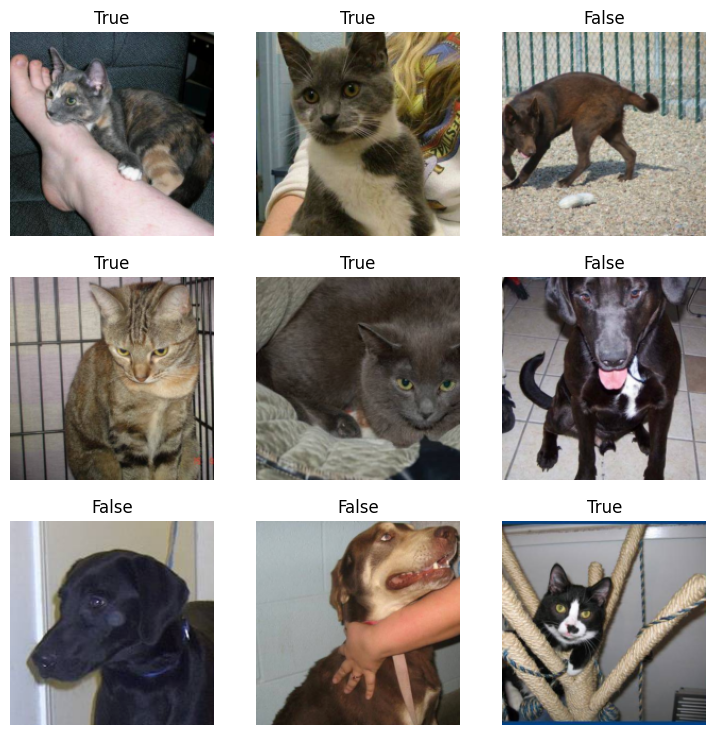

In [10]:
dls.show_batch()

In [ ]:
?ImageDataLoaders.from_name_func

Create our learner

In [8]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.118732,0.064016,0.027500,05:31
1,0.086863,0.062019,0.017500,05:19
2,0.060152,0.063972,0.017500,05:19


In [ ]:
?vision_learner

Now we can export our trained Learner. This contains all the information needed to run the model

In [9]:
learn.export('model.pkl')   #   cretaes a file that stores our model

Finally, open the Kaggle sidebar on the right if it's not already, and find the section marked "Output". Open the /kaggle/working folder, and you'll see model.pkl. Click on it, then click on the menu on the right that appears, and choose "Download". After a few seconds, your model will be downloaded to your computer, where you can then create your app that uses the model.